# Notatki do pracowni drugiej

In [219]:
using PyPlot
include("program.jl")
c = 299792.458
earth_rad = 6370.0
sat_rad = 20000.0;

## Metoda najmniejszych kwadratów

Mamy układ równań
$$ (x-x_{i})^2 + (y - y_{i})^2 + (z - z_{i})^2 - \big[c(t_{i}-t)\big]^2 = 0 \ , \ i =  1, 2 \ ... \ n \ , \ n > 4$$
Niech
$$ f_{i}(x, y, z, t) = (x-x_{i})^2 + (y - y_{i})^2 + (z - z_{i})^2 - \big[c(t_{i}-t)\big]^2 $$
Chcemy znaleźć takie $(x, y, z, t)$, że
$$\sum_{1}^{n} f_{i}^2(x, y, z, t) $$ 
będzie minimalne.

Zastosujemy metodę będącą uogólnieniem metody Newtona opisanej powyżej:
Niech:
$$ h_{n} = -(J_{n}^T J_{n})^{-1} J^T F(x_{n})$$
gdzie

$J_{n}$ - macierz pochodnych cząstkowych w punkcie $x_n$ 

$J_{n}[i, j] = \frac{\partial f_i}{\partial x_j} $

$F(x) \in R^4 \to R^n , F(x) = \big[f_{i}(x)\big]$

Wtedy
$$ x_{n+1} = x_{n} + h_{n} $$
Jest n-tym przybliżeniem metody.

# Testy

In [220]:
sat = Array{Array{Float64}}(7)

sat[1] = [15600.0, 7540.0, 20140.0, 7.074e-2]
sat[2] = [18760.0, 2750.0, 18610.0, 7.220e-2]
sat[3] = [17610.0, 14630.0, 13480.0, 7.690e-2]
sat[4] = [19170.0, 610.0, 18390.0, 7.242e-2]
sat[5] = rand_position(sat_rad)
sat[6] = rand_position(sat_rad)
sat[7] = rand_position(sat_rad)

x = rand_position(earth_rad)
prepsat!(x, sat)

println(x)
println(newton(sat))
println(algebraic(sat))
println(bancroft(sat))
println(heura(sat))

[-6246.34, 119.518, 1243.3, -0.0715652]
[-6246.34, 119.518, 1243.3, -0.0715652]
[-6246.34, 119.518, 1243.3, -0.0715652]
[-6246.34, 119.518, 1243.3, -0.0715652]
[-6246.34, 119.518, 1243.3, -0.0715652]


## Dokładność na losowej ścieżce, model teoretyczny

Będziemy sprawdzać dokładność metod za pomocą symulacji trasy obiektu na powierzchni Ziemi oraz pozycji satelit. Znając rzeczywiste położenie satelity, obiektu i błędu zegara wyliczamy stałe $t_{i}$. Następnie stosujemy każdą z metod do wyliczenia położenia obiektu.

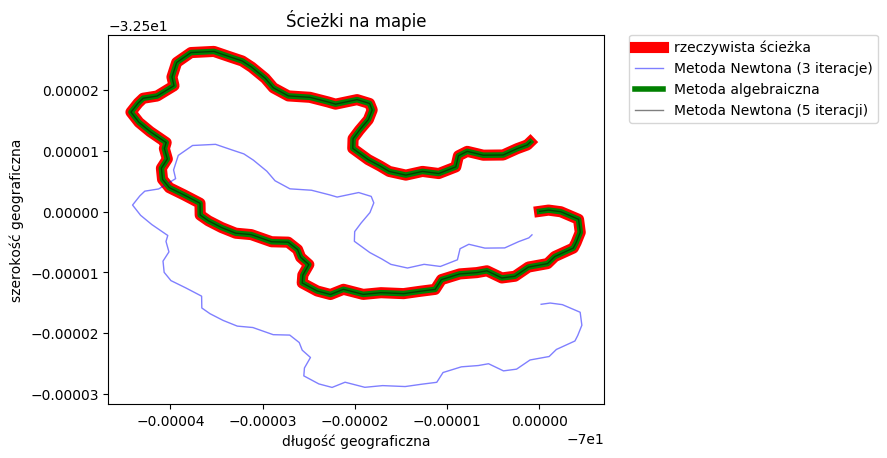

HTML{String}("<table border=\"1\">\n<tr><td><pre>Metoda</pre><td><pre>Największy błąd</pre><td><pre>Najmniejszy błąd</pre></tr><tr><td><pre>Newtona, 3 iteracje</pre><td><pre>1.7039276648842685</pre><td><pre>1.70392492154053</pre></tr><tr><td><pre>Newtona, 5 iteracji</pre><td><pre>1.6947867001570235e-7</pre><td><pre>0.0</pre></tr><tr><td><pre>Algebraiczna</pre><td><pre>1.4298405828446673e-7</pre><td><pre>0.0</pre></tr><tr><td><pre>Bancrofta</pre><td><pre>1.5813786002297032e-7</pre><td><pre>0.0</pre></tr></table>")

In [221]:
sat_count = 8
sat_coords = [ rand_position(sat_rad)[1:3] for i = 1:sat_count ]

coords = path(3000, -70, -32.5)
x = coords[1]
y = coords[2]

mistake = 0.005

newton_coords = GPS_newton(coords, mistake, 3, false)
xn = newton_coords[1]
yn = newton_coords[2]

newton5_coords = GPS_newton(coords, mistake, 5, false)
xn5 = newton5_coords[1]
yn5 = newton5_coords[2]

alg_coords = GPS_alg(coords, mistake, false)
xa = alg_coords[1]
ya = alg_coords[2]

bancroft_coords = GPS_bancroft(coords, mistake, false)
xb = bancroft_coords[1]
yb = bancroft_coords[2]

fig, ax = subplots()

title("Ścieżki na mapie")
xlabel("długość geograficzna")
ylabel("szerokość geograficzna")
ax[:plot](x, y, "-", color="red", linewidth=8, alpha=1.0, label="rzeczywista ścieżka")
ax[:plot](xn, yn, "-", color="blue", linewidth=1, alpha=0.5, label="Metoda Newtona (3 iteracje)")
ax[:plot](xa, ya, "-", color="green", linewidth=4, alpha=1.0, label="Metoda algebraiczna")
ax[:plot](xn5, yn5, "-", color="black", linewidth=1, alpha=0.5, label="Metoda Newtona (5 iteracji)")

ax[:legend](bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
show()

methods =["Newtona, 3 iteracje", "Newtona, 5 iteracji", "Algebraiczna", "Bancrofta"]
results = [newton_coords, newton5_coords, alg_coords, bancroft_coords]

MinMaxMistakeTable(methods, results, coords)

## Błąd metod w zależności od błędu zegara

In [165]:
function clock_mistake_plot(method, coords, maxiter)
    res = [[], []]
    dm = 0.01
    mistake = 0.0
    for i in 1:maxiter
        alg_coords = method(coords, mistake)
        dist = MAXdist(coords, alg_coords)
        push!(res[1], mistake)
        push!(res[2], dist)
        mistake+=dm
    end
    res
end;

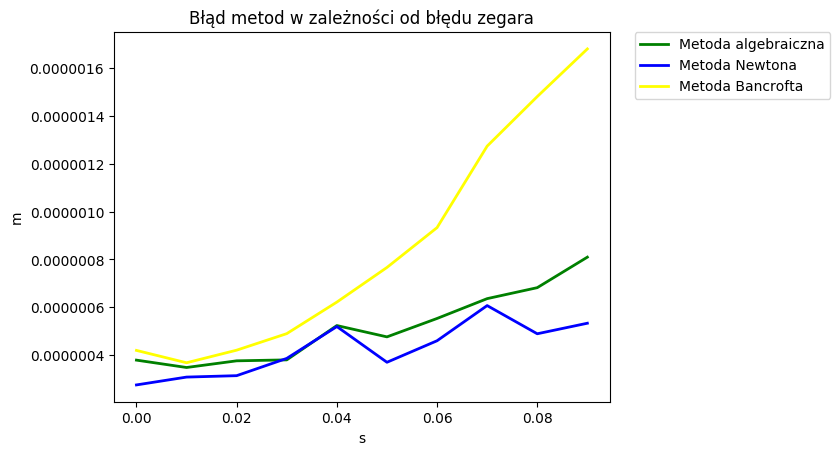

In [134]:
data1 = clock_mistake_plot(GPS_alg, coords, 10)
x = data1[1]
y1 = data1[2]

data2 = clock_mistake_plot(GPS_newton, coords, 10)
y2 = data2[2]

data4 = clock_mistake_plot(GPS_bancroft, coords, 10)
y4 = data4[2]

fig, ax = subplots()

title("Błąd metod w zależności od błędu zegara")
ylabel("m")
xlabel("s")
ax[:plot](x, y1, "-", color="green", linewidth=2, alpha=1.0, label="Metoda algebraiczna")
ax[:plot](x, y2, "-", color="blue", linewidth=2, alpha=1.0, label="Metoda Newtona")
ax[:plot](x, y4, "-", color="yellow", linewidth=2, alpha=1.0, label="Metoda Bancrofta")
ax[:legend](bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

show()

## Błąd metody Newtona w zależności od liczby iteracji

In [167]:
function iter_mistake_plot(method, coords, maxiter)
    res = [[], []]
    for i in 1:maxiter
        newton_coords = method(coords, 0.005, i)
        dist = MAXdist(coords, newton_coords)
        push!(res[1], i)
        push!(res[2], dist)
    end
    return res
end
show()

In [168]:
data1 = iter_mistake_plot(GPS_newton, coords, 10)
x = data1[1]
y1 = data1[2]

tab = hcat(x, y1)

table(tab, column_names=[:"Iteracja", :"Błąd metody Newtona (m)"])

HTML{String}("<table border=\"1\">\n<tr><td><pre>Iteracja</pre><td><pre>Błąd metody Newtona (m)</pre></tr><tr><td><pre>1</pre><td><pre>154649.11926435938</pre></tr><tr><td><pre>2</pre><td><pre>3391.7013732968758</pre></tr><tr><td><pre>3</pre><td><pre>1.5391869188003715</pre></tr><tr><td><pre>4</pre><td><pre>3.456669940804498e-7</pre></tr><tr><td><pre>5</pre><td><pre>4.2289058683537114e-8</pre></tr><tr><td><pre>6</pre><td><pre>4.108422737137377e-8</pre></tr><tr><td><pre>7</pre><td><pre>5.03092196127848e-8</pre></tr><tr><td><pre>8</pre><td><pre>4.064586668311471e-8</pre></tr><tr><td><pre>9</pre><td><pre>3.92329966175964e-8</pre></tr><tr><td><pre>10</pre><td><pre>4.0901990035797745e-8</pre></tr></table>")

## Skuteczność metod Newtona i algebraicznej

In [222]:
sat_count = 4
sat = Array{Array{Float64}}(sat_count)

m1=0
m2=0
iters = 10000

for i in 1:iters 
    sat = [rand_position(sat_rad) for j = 1:sat_count]
    x = rand_position(earth_rad)
    prepsat!(x, sat)
    x1 = newton(sat[1:4])[1:3]
    x2 = algebraic(sat[1:4])[1:3]
    dx1 = sqrt(sum(abs2, x1-x[1:3]))
    dx2 = sqrt(sum(abs2, x2-x[1:3]))
    if dx1 > 1000
        m1+=1
    end
    if dx2 > 1000
        m2 +=1
    end
end

println("LICZBA POMYŁEK NEWTONA ", m1, " na ", iters)
println("LICZBA POMYŁEK ALGEBRAICZNEJ ", m2, " na ", iters)

LICZBA POMYŁEK NEWTONA 1576 na 10000
LICZBA POMYŁEK ALGEBRAICZNEJ 1494 na 10000


## Losowe punkty na Ziemi

In [216]:
sat_count = 10
sat = Array{Array{Float64}}(sat_count)

mean1 = 0
mean2 = 0
mean3 = 0
mean4 = 0

iters = 10000
iters_ok = 0

for i = 1:iters
    sat = [ rand_position(sat_rad) for j = 1:sat_count ]
    x = rand_position(earth_rad)
    prepsat!(x, sat)
    x1 = newton(sat[1:4])[1:3]
    x2 = algebraic(sat[1:4])[1:3]
    x3 = bancroft(sat)[1:3]
    
    dx1 = sqrt(sum(abs2, x1-x[1:3]))
    dx2 = sqrt(sum(abs2, x2-x[1:3]))
    if dx1 < 1000 && dx2 < 1000
        mean1 += dx1
        mean2 += dx2
        mean3 += sqrt(sum(abs2, x3 - x[1:3]))
        iters_ok += 1
    end
end

mean1 /= iters_ok
mean2 /= iters_ok
mean3 /= iters_ok

names = ["Newton", "Algebraiczna", "Bancroft"]
results = [mean1, mean2, mean3]

table(hcat(names, results), column_names=[:Metoda, :"Średni błąd (m)"])

HTML{String}("<table border=\"1\">\n<tr><td><pre>Metoda</pre><td><pre>Średni błąd (m)</pre></tr><tr><td><pre>Newton</pre><td><pre>0.15665494433659835</pre></tr><tr><td><pre>Algebraiczna</pre><td><pre>0.2133842603218519</pre></tr><tr><td><pre>Bancroft</pre><td><pre>2.164423131463717e-11</pre></tr></table>")

## Dokładność na losowej ścieżce, model praktyczny

Aby wzbogacić symulację, dodany został współczynnik $inacuraccy$ mający na celu odwzorować zmiany prędkości światła ośrodkach innych niż próżnia.

In [229]:
sat_count = 8
sat_coords = [ rand_position(sat_rad)[1:3] for i = 1:sat_count ]

coords = path(3000, -70, -32.5)
x = coords[1]
y = coords[2]

mistake = 0.005

newton_coords = GPS_newton(coords, mistake, 3, true)
xn = newton_coords[1]
yn = newton_coords[2]

leastSquares_coords = GPS_leastSquares(coords, mistake, 3, sat_count, true)
xl = leastSquares_coords[1]
yl = leastSquares_coords[2]

alg_coords = GPS_alg(coords, mistake, true)
xa = alg_coords[1]
ya = alg_coords[2]

bancroft_coords = GPS_bancroft(coords, mistake, true)
xb = bancroft_coords[1]
yb = bancroft_coords[2];

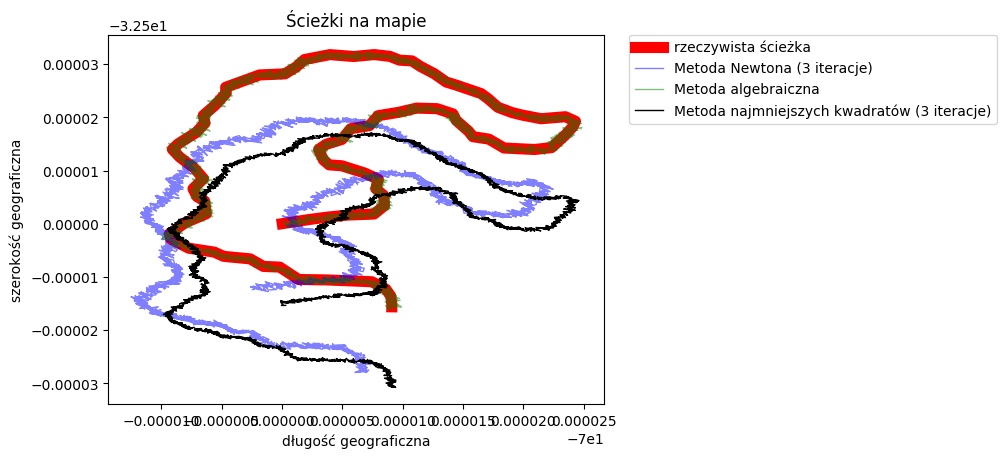

HTML{String}("<table border=\"1\">\n<tr><td><pre>Metoda</pre><td><pre>Największy błąd</pre><td><pre>Najmniejszy błąd</pre></tr><tr><td><pre>Newtona, 3 iteracje</pre><td><pre>1.4742220479439472</pre><td><pre>1.3015213557685652</pre></tr><tr><td><pre>Najmnieszych kwadratów, 3 iteracje</pre><td><pre>1.726858872370533</pre><td><pre>1.617949023640744</pre></tr><tr><td><pre>Algebraiczna</pre><td><pre>0.12765772393242725</pre><td><pre>0.0007777778715327564</pre></tr><tr><td><pre>Bancrofta</pre><td><pre>0.1274818070163351</pre><td><pre>0.0006486805648680677</pre></tr></table>")

In [231]:
fig, ax = subplots()

title("Ścieżki na mapie")
xlabel("długość geograficzna")
ylabel("szerokość geograficzna")
ax[:plot](x, y, "-", color="red", linewidth=8, alpha=1.0, label="rzeczywista ścieżka")
ax[:plot](xn, yn, "-", color="blue", linewidth=1, alpha=0.5, label="Metoda Newtona (3 iteracje)")
ax[:plot](xa, ya, "-", color="green", linewidth=1, alpha=0.5, label="Metoda algebraiczna")
ax[:plot](xl, yl, "-", color="black", linewidth=1, alpha=1.0, label="Metoda najmniejszych kwadratów (3 iteracje)")
ax[:legend](bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
show()

methods =["Newtona, 3 iteracje", "Najmnieszych kwadratów, 3 iteracje", "Algebraiczna", "Bancrofta"]
results = [newton_coords, leastSquares_coords, alg_coords, bancroft_coords]

MinMaxMistakeTable(methods, results, coords)


## Błąd w zależności od liczby satelit

In [225]:
function leastSquares_sat_plot(positers=100, satiters=50)
    res = [[],[]]
    
    sat = [ rand_position(sat_rad) for i in 1:satiters ]
    means = zeros(satiters)
    iters_ok = zeros(satiters)

    for i in 1:positers
        x = rand_position(earth_rad)
        prepsat!(x, sat, true)
        for sat_cnt in 4:satiters
            x1 = leastSquares(sat, 10, sat_cnt)[1:3]
            dx = sqrt(sum(abs2, x1-x[1:3]))
            if dx < 10000
                means[sat_cnt] += dx
                iters_ok[sat_cnt] += 1
            end
        end
    end
    for i in 6:satiters
        push!(res[1], i)
        push!(res[2], means[i]/iters_ok[i])
    end
    res
end;

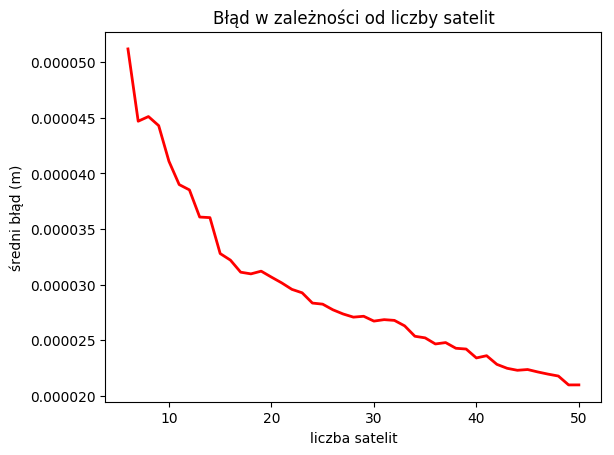

In [226]:
data = leastSquares_sat_plot()
x = data[1]
y = data[2]

fig, ax = subplots()

title("Błąd w zależności od liczby satelit")
ylabel("średni błąd (m)")
xlabel("liczba satelit")
ax[:plot](x, y, "-", color="red", linewidth=2, alpha=1.0)
show()